[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lorenzo-arcioni/BLAST-OUT-postprocessing/blob/main/BLAST%20tool%20for%20multiple%20databases%20data%20visualization.ipynb)

# Overlap Explorer: A Jupyter Notebook for Comparing Annotation Results Across Databases Using Venn Diagrams

Venn diagrams are a powerful visualization tool used in many areas of research, including bioinformatics. They are typically used to show the overlap between different sets or categories of data. In the context of omics data analysis, Venn diagrams can help identify common or unique hits across multiple databases or analyses, providing insights into the relationships between different datasets. In addition to the traditional Venn diagram, there are also variations such as Euler diagrams and Edwards-Venn diagrams, which can provide different types of visual representations of the data.

This notebook is able to interpret tab-separated value (TSV) files resulting from annotation software (BLAST/Diamond) and allows the generation of Venn diagrams that visualize the distribution of hits for each sequence in different databases. This allows biologists or bioinformaticians to verify the common hits among databases and how the matches are distributed.

It is necessary to have the information regarding the ID of each sequence present in the tabular file (**qseqid**) and to have installed the libraries: 
* pandas
* matplotlib
* matplotlib_venn

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3_unweighted 
from matplotlib_venn import venn2_unweighted

In this section, it is possible to insert, by modifying the variables, information about the results.

So before you run this cell, follow the instructions in the comments.

In [8]:
# Insert the names (or paths) of the tsv files
files = [
    "../culex_pipien/culex_pipiens_subset_corset.fasta.transdecoder.cds.nr.blastx.tsv",
    "../culex_pipien/culex_pipiens_subset_corset.fasta.transdecoder.cds.tr.blastx.tsv",
    "../culex_pipien/culex_pipiens_subset_corset.fasta.transdecoder.cds.sp.blastx.tsv"   
]

# Insert the titles of the graph
title = "Culex pipiens - Blastx"

# Insert the databases names
databases_names =[
    "Nr", 
    "TrEMBL",
    "Swiss-Prot",
]

# Insert the path of the graphs
path = "../culex_pipien/ " + title

#Creating a dictonary list where each dict contains all sequences hits count
sets_list = []

# Set the outformat
# e.g. 
# outfmt = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"
# If there are column names in the file then set outfmt = None
outfmt = "qseqid qlen sseqid sallseqid slen qstart qend sstart send qseq full_qseq sseq full_sseq evalue bitscore score length pident nident mismatch positive gapopen gaps ppos qframe btop cigar staxids sscinames sskingdoms skingdoms sphylums stitle salltitles qcovhsp scovhsp qtitle qqual full_qqual qstrand"

# Set the index of the target feature (must be not None)
index = 'qseqid'

for f in files:
    #Import the dataset
    df = pd.read_csv(f, sep="\t", names=outfmt.split())
    
    #Drop Nan rows
    df.dropna(subset=[index], inplace=True)
    
    #Create and append the dict
    sets_list.append(set(df[index]) - {index})

And now plot!

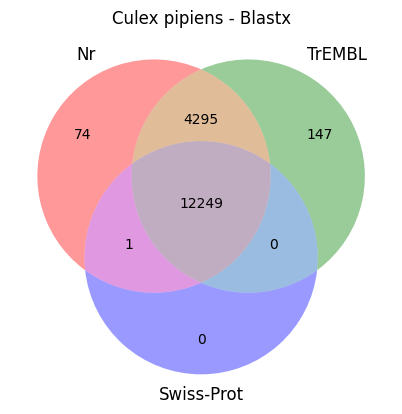

In [9]:
if len(files) == 2:
    venn2_unweighted(sets_list, databases_names)
elif len(files) == 3:
    venn3_unweighted(sets_list, databases_names)
else:
    print("This notebook only supports 2 or 3 dimensional venn diagram")
plt.title(title)
plt.savefig(path + '.png', bbox_inches = 'tight', dpi=350)
plt.show()